In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv(r'C:\Users\viraj\Ml-academy\Week 01\data\processed\ChurnModelling_Missing_Values_Handled.csv')


In [4]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [6]:
len(df)

10000

### distribution plot

In [9]:
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']
numerical_features = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore']

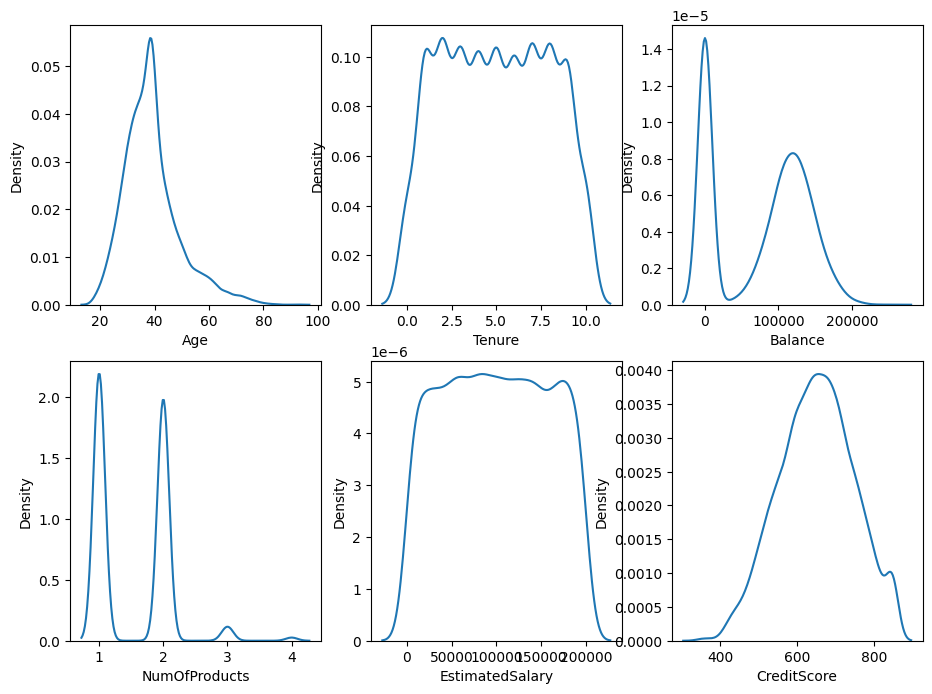

In [15]:
fix,axes = plt.subplots(2,3, figsize=(11,8))
axes = axes.flatten()
for idx, col in enumerate(numerical_features):
    sns.kdeplot(data= df[col], ax= axes[idx])
    ##axes[idx].set_title(f'Distribution of {col}')


plt.show()

+ Balance is bi-modal. it has 2 distributions(but has variance)
+ Tenure is uniform
+ Estimated salary uniform
+ no of products has 3 modals.stad deviation is very low. so no of products should go to categorical variable

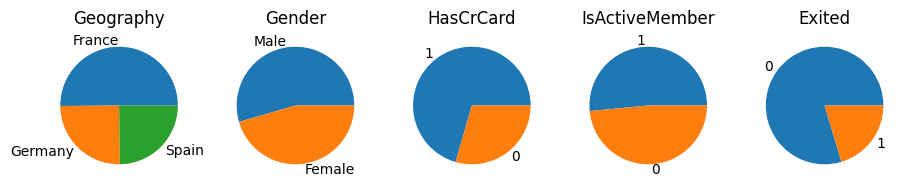

In [19]:
fix,axes = plt.subplots(1,5 , figsize=(11,8))
axes = axes.flatten()
for idx, col in enumerate(categorical_features):
    df[col].value_counts().plot(kind='pie', ax= axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel("")


plt.show()

### Box plot

for numerical variables

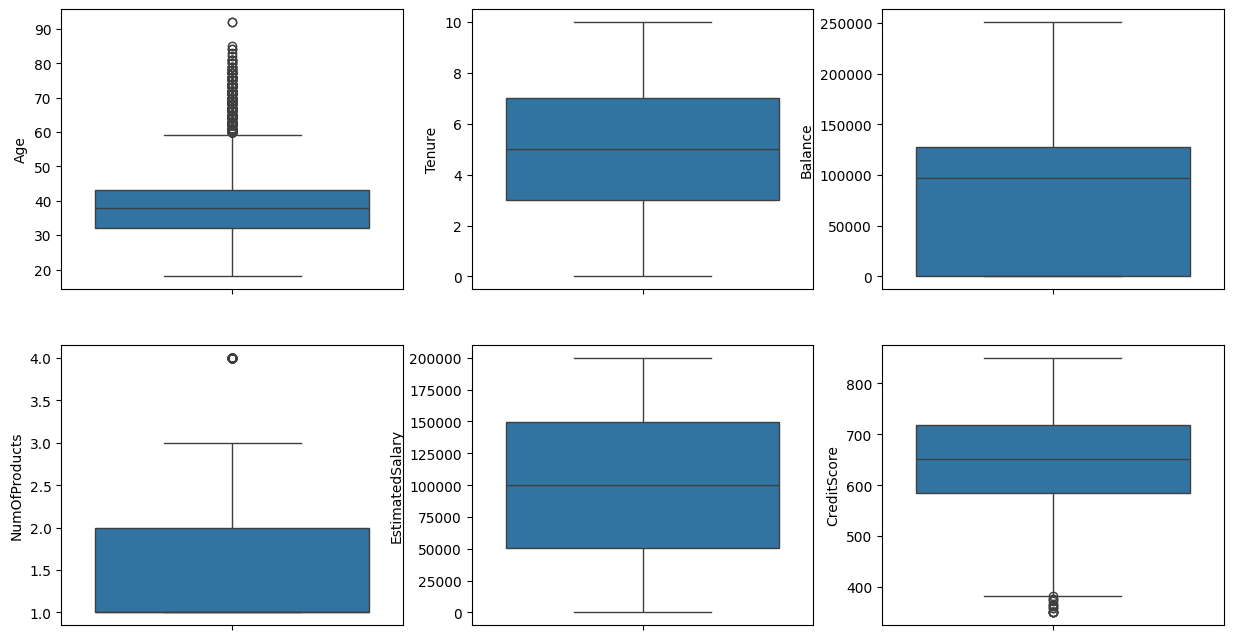

In [22]:
numerical_features = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'CreditScore']
fix,axes = plt.subplots(2,3, figsize=(15,8))

sns.boxplot(data=df['Age'], ax=axes[0,0])
sns.boxplot(data=df['Tenure'], ax=axes[0,1])
sns.boxplot(data=df['Balance'], ax=axes[0,2])
sns.boxplot(data=df['NumOfProducts'], ax=axes[1,0])
sns.boxplot(data=df['EstimatedSalary'], ax=axes[1,1])
sns.boxplot(data=df['CreditScore'], ax=axes[1,2])

plt.show()

### empirical rule

In [30]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()
    lower_limit = mean - (3 * std)
    upper_limit = mean + (3 * std)
    return (data < lower_limit) | (data > upper_limit)

In [31]:
numerical_features = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore']

for col in numerical_features:
    n_outliers = find_anomaly(df[col]).sum()
    print(f"Number of outliers in {col}: {n_outliers}")

Number of outliers in Age: 144
Number of outliers in Tenure: 0
Number of outliers in Balance: 0
Number of outliers in EstimatedSalary: 0
Number of outliers in CreditScore: 8


### IQR method

In [32]:
def find_anomaly(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return (data < lower_limit) | (data > upper_limit)

    

In [33]:
numerical_features = ['Age', 'Tenure', 'Balance', 'EstimatedSalary', 'CreditScore']

for col in numerical_features:
    n_outliers = find_anomaly(df[col]).sum()
    print(f"Number of outliers in {col}: {n_outliers}")

Number of outliers in Age: 501
Number of outliers in Tenure: 0
Number of outliers in Balance: 0
Number of outliers in EstimatedSalary: 0
Number of outliers in CreditScore: 15
